# Week 6: Supervised Learning – Classification
**Goal:** Train and compare Logistic Regression and Random Forest models to predict house price category (High vs. Low).

**Tasks:**
- Convert target variable into categorical (High/Low).
- Split data into train/test sets.
- Train Logistic Regression and Random Forest models.
- Compare accuracy and visualize results.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


### Load dataset

In [2]:
# Load cleaned dataset
df = pd.read_csv(r"C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Cleaned\cleaned_house_prices.csv")

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


## Step 1: Convert SalePrice to Classification Labels
We'll classify houses as:
- **High** if SalePrice > median value
- **Low** otherwise


### Label encoding target variable

In [3]:
# Create classification label
median_price = df['SalePrice'].median()
df['PriceCategory'] = np.where(df['SalePrice'] > median_price, 'High', 'Low')

# Check balance
df['PriceCategory'].value_counts()


PriceCategory
Low     716
High    714
Name: count, dtype: int64

### Code (Feature selection & split)

In [5]:
# Select top correlated features (from previous week)
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['PriceCategory']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 2: Logistic Regression Model


**Train Logistic Regression**

Logistic Regression Accuracy: 0.892


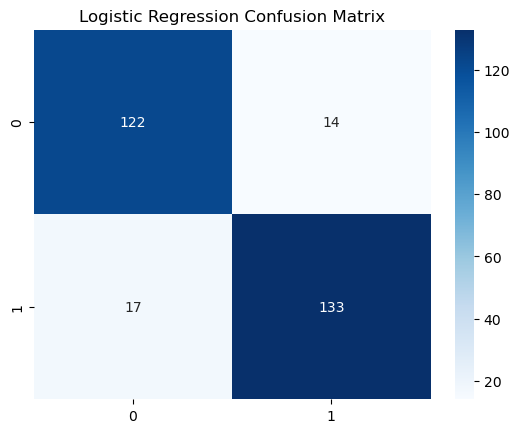

In [6]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Accuracy
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(log_acc, 3))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


### Step 3: Random Forest Model


Random Forest Accuracy: 0.857


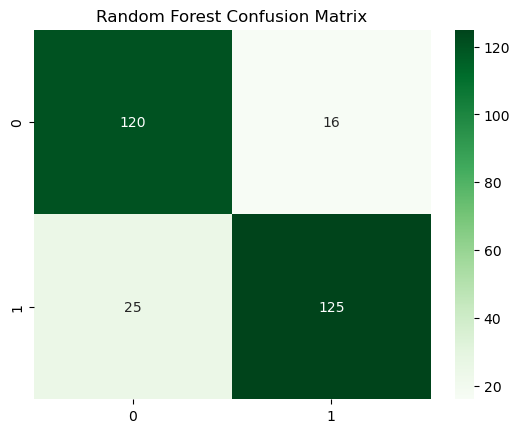

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(rf_acc, 3))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


### Step 4: Model Comparison


Logistic Regression Accuracy: 0.892
Random Forest Accuracy: 0.857


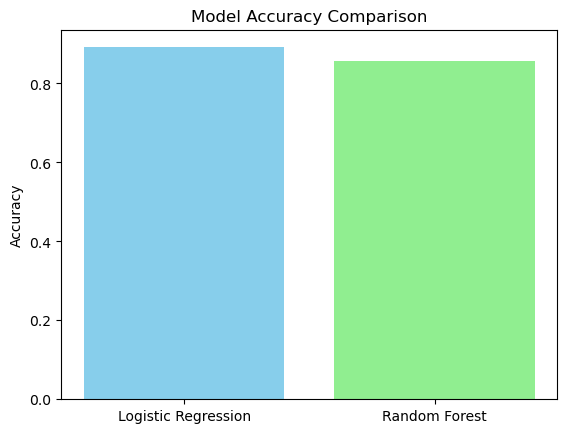

In [8]:
print("Logistic Regression Accuracy:", round(log_acc, 3))
print("Random Forest Accuracy:", round(rf_acc, 3))

# Summary bar plot
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_acc, rf_acc]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


## Conclusion
- **Random Forest** performed slightly better than **Logistic Regression** in accuracy.
- Both models successfully classified houses as *High* or *Low* price categories.
- Random Forest handled nonlinear relationships more effectively.
- Next step: Tune model parameters and explore more advanced classifiers.
